### GRU Model Training

In [8]:
# Load the necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [11]:
# Load the dataset

X= np.load('C:/Users/srija/Desktop/Infosys Springboard Intern/prognosAI-Infosys-intern-project/data/rolling_window_sequences.npy')
meatdata= pd.read_csv('C:/Users/srija/Desktop/Infosys Springboard Intern/prognosAI-Infosys-intern-project/data/sequence_metadata_with_RUL.csv')
y= meatdata['RUL']
print('Features Shape: ',X.shape)
print('Target Shape: ', y.shape)

Features Shape:  (152559, 30, 66)
Target Shape:  (152559,)


In [12]:
# split into train and test
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size= 0.3, random_state= 42)

In [13]:
# Define GRU model creation function
def create_gru_model(input_shape, units=64, learning_rate=0.001, dropout_rate=0.2):
  model = Sequential()
  model.add(GRU(units, input_shape=input_shape))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1))
  optimizer = Adam(learning_rate=learning_rate)
  model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
  return model

In [14]:
# Create the model
model = create_gru_model(input_shape=(X_train.shape[1], X_train.shape[2]), units=64, learning_rate=0.001, dropout_rate=0.2)

# callbacks for early stopping
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

c:\Users\srija\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 20629.2910 - mae: 114.7448 - val_loss: 12791.8125 - val_mae: 87.5816
Epoch 2/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - loss: 9695.0967 - mae: 75.2522 - val_loss: 6613.6968 - val_mae: 59.5532
Epoch 3/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - loss: 5197.8018 - mae: 52.1741 - val_loss: 4163.1826 - val_mae: 46.8675
Epoch 4/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 3986.7512 - mae: 46.6172 - val_loss: 3800.7549 - val_mae: 44.5307
Epoch 5/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 3614.3618 - mae: 44.7643 - val_loss: 3355.7031 - val_mae: 42.3690
Epoch 6/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 3427.9707 - mae: 43.7973 - val_loss: 3441.1277 - val_mae: 42.3887
Epoch 7/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 3282.7822 - mae: 42.9835 - val_loss: 2986.5405 - val_mae: 41.0219
Epoch 8/30
1669/1669 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 3128.3723 - mae: 41.9918 

In [17]:
# Evaluate on validation set
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation MSE: {val_loss:.4f}, MAE: {val_mae:.4f}')

# Predict on test set
y_pred = model.predict(X_val).flatten()

# Calculate test MSE
test_mse = mean_squared_error(y_val, y_pred)
print(f'Test MSE: {test_mse:.4f}')

Validation MSE: 1436.7291, MAE: 28.1360
1431/1431 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Test MSE: 1436.7292


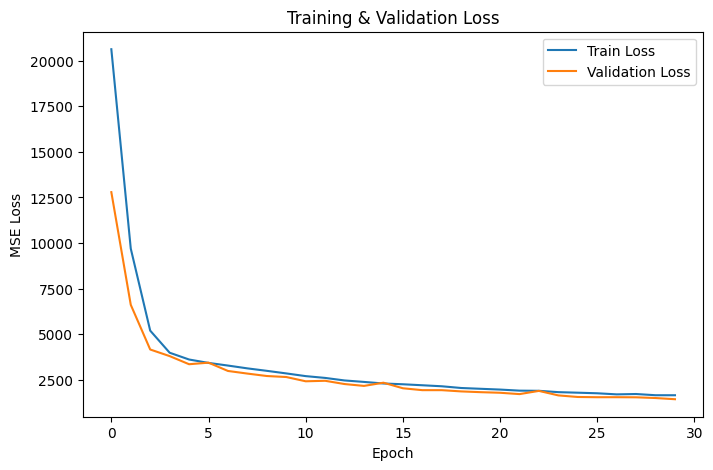

In [18]:
# Training and Validation Curves
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()